# Affine transformations
**Ricardo Antonio Gutiérrez Esparza \
Juan Marquina Cancino**

In [1]:
import numpy as np
import skimage.io
import skimage.viewer
import matplotlib.pyplot as plt
import ipympl
from PIL import Image
from scipy import ndimage as ndi
%matplotlib inline

D:\Users\ricar\anaconda3\lib\site-packages\skimage\viewer\utils\__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


# 1. Apply affine transformations to vectors

In [2]:
def plot_v_dif(v_vector, w_vector):
    '''Auxiliar function to plot vectors
    '''
    v = [float(v_vector[0]), float(v_vector[1])]
    w = [float(w_vector[0]), float(w_vector[1])]

    array = np.array([[0, 0, v[0], v[1]], 
                     [0, 0, w[0], w[1]]])

    X, Y, V, W = zip(*array)
    plt.figure()
    plt.ylabel('Y-axis')
    plt.xlabel('X-axis')
    ax = plt.gca()
    ax.annotate(f'v({v[0]},{v[1]})', (v[0],v[1]),fontsize=14)
    plt.scatter(v[0],v[1], s=10,c='red')
    ax.annotate(f'w({w[0]},{w[1]})', (w[0],w[1]),fontsize=14)
    plt.scatter(w[0], w[1], s=10,c='blue')
    ax.quiver(X, Y, V, W, angles='xy', scale_units='xy',color=['r','b'],scale=1)
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])

    plt.grid()
    plt.draw()
    plt.show()

In [3]:
def apply_affine_transformation_vec(v, a, b, c, d, tx, ty):
    '''Applies affine transformation on the given vector, with the given
       parameters, and plots the original and transformed vector.
       
       Parameters: v -> [Tuple] Original vector
                   a, b, c, d -> [float] Values for the transformation matrix
                   tx, ty -> [float] Values for the translation vector
    '''
    vx = v[0]
    vy = v[1]
    v_vector = np.matrix([[vx],[vy]])
    
    #apply the transformation
    A = np.matrix([[a, b], [c, d]])
    t_vector =np.matrix([[tx],[ty]])
    
    #print(A, v_vector, t_vector, sep='\n\n')
    w_vector = np.matmul(A,v_vector) + t_vector

    plot_v_dif(v_vector, w_vector)

## Scale

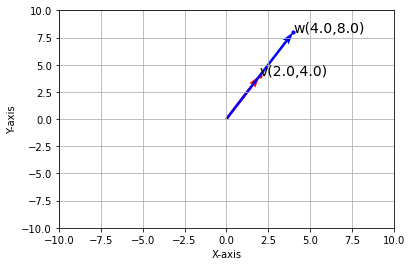

In [4]:
# Proportional scale
apply_affine_transformation_vec((2, 4), 2, 0, 0, 2, 0, 0)

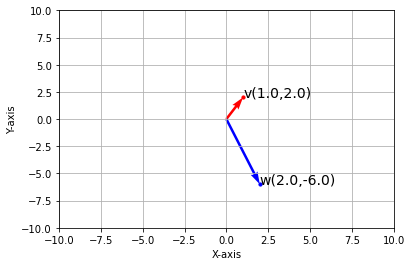

In [5]:
# Non-proportional scale
apply_affine_transformation_vec((1, 2), 2, 0, 0, -3, 0, 0)

## Translation

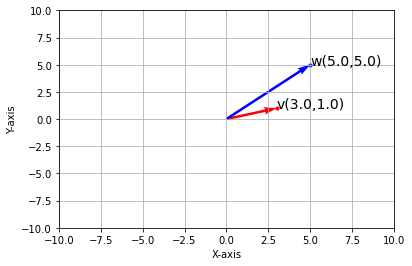

In [6]:
apply_affine_transformation_vec((3,1), 1, 0, 0, 1, 2, 4)

## Rotation

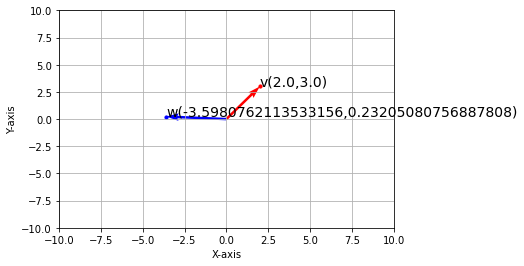

In [7]:
th = 2*np.pi/3
apply_affine_transformation_vec((2,3), np.cos(th), -np.sin(th), np.sin(th), np.cos(th), 0, 0)

# 2. Apply affine transformations to images

In [8]:
def read_image(fname):
    '''Auxiliar function to read the image
    '''
    img = skimage.io.imread(fname="photo.jpg")
    return img[:,:,1]

In [9]:
def apply_affine_transformation_img(img, mat):
    '''Applies affine transformation on the given image, with the given
       transformation matrix, and shows the transformed image.
       
       Parameters: img -> [ndarray] The gray scale image
                   mat -> [array] The transformation matrix
    '''
    to_show = ndi.affine_transform(img, mat)
    plt.imshow(to_show, cmap='gray')

## Scale and translation

In [10]:
image = read_image('photo.jpg')

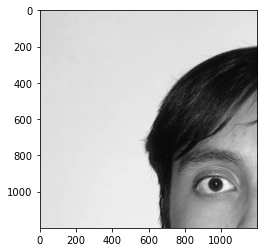

In [11]:
# Proportional scale
apply_affine_transformation_img(image, [[1/2,0,0],[0,1/2,0],[0,0,1]])

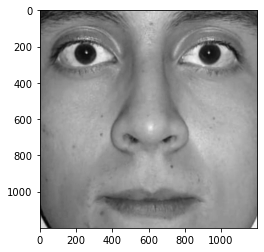

In [12]:
# Proportional scale + translation
apply_affine_transformation_img(image, [[1/3,0,400],[0,1/3,400],[0,0,1]])

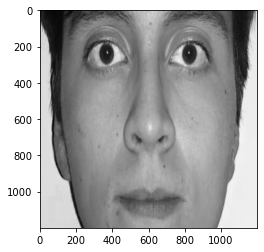

In [13]:
# Non-proportional scale
apply_affine_transformation_img(image, [[1/3,0,400],[0,1/2,300],[0,0,1]])

## Rotation

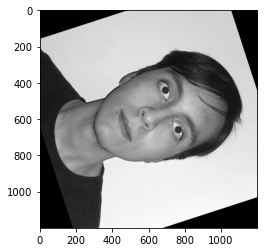

In [14]:
th = 2*np.pi/5
apply_affine_transformation_img(image, [[np.cos(th),-np.sin(th),1000],[np.sin(th),np.cos(th),-150],[0,0,1]])

## Shear

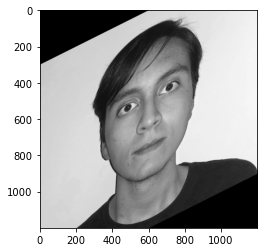

In [15]:
# One axis
apply_affine_transformation_img(image, [[1,0.5,-300],[0,1,0],[0,0,1]])

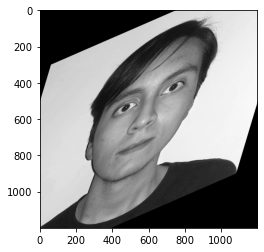

In [16]:
# Two axis
transform_m = np.array([[1,0.5,-300],[0,1,0],[0,0,1]]) @ np.array([[1,0,0],[0.3,1,-150],[0,0,1]])
apply_affine_transformation_img(image, transform_m)

## Multiple transformations at once

In [17]:
scale_m = np.array([[1/3,0,400],[0,1/2,300],[0,0,1]])
th = 2*np.pi/5
rotation_m = np.array([[np.cos(th),-np.sin(th),1000],[np.sin(th),np.cos(th),-150],[0,0,1]])
shear_m = np.array([[1,0.5,-300],[0,1,0],[0,0,1]]) @ np.array([[1,0,0],[0.3,1,-150],[0,0,1]])
transform_m = scale_m @ rotation_m @ shear_m 

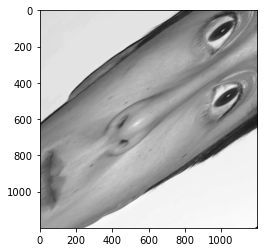

In [18]:
apply_affine_transformation_img(image, transform_m)